In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *

from uncertainties import ufloat
from uncertainties import umath
sns.set_theme(style="darkgrid")
sns.set_context("paper")

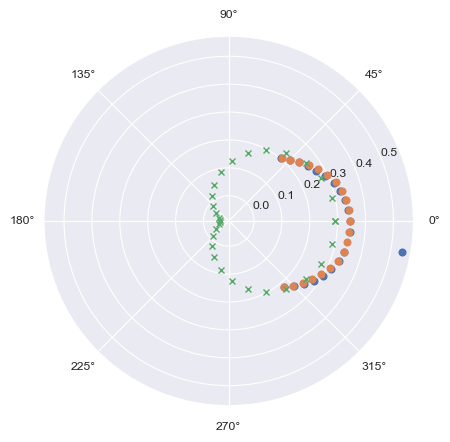

In [26]:
plt.axes(projection='polar')

df=pd.read_csv("LambertschesGesetz.csv")
rads = df["Winkel"]*2*np.pi/360

plt.polar(rads, df["Spannung 1"], "o") 
plt.polar(rads, df["Spannung 2"], "o")
sigma=5.6704E-8 #W/m^4/K^2
T=360+273.15

plt.polar(np.linspace(0, 2*np.pi, 30), 0.115+np.ones(30)*sigma*T**4/4/0.115**2*0.032**2/1000*np.cos(np.linspace(0, 2*np.pi, 30)), "x")
plt.show()